# IMPORTACION DE LIBRERIAS Y LECTURA DE DATOS

In [3]:
import pandas as pd
import matplotlib.pyplot as pt
%config IPCompleter.greedy=True
df="../Telco-Customer-Churn.csv"
pd.options.display.min_rows=6
df=pd.read_csv(df,sep=",")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
import funpymodeling as fp
df_eda=fp.status(df)
df_eda

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,customerID,0,0.0,0,0.000000,7043,object
1,gender,0,0.0,0,0.000000,2,object
2,SeniorCitizen,0,0.0,5901,0.837853,2,int64
3,Partner,0,0.0,0,0.000000,2,object
4,Dependents,0,0.0,0,0.000000,2,object
5,tenure,0,0.0,11,0.001562,73,int64
6,PhoneService,0,0.0,0,0.000000,2,object
7,MultipleLines,0,0.0,0,0.000000,3,object
8,InternetService,0,0.0,0,0.000000,3,object
9,OnlineSecurity,0,0.0,0,0.000000,3,object


# IDENTIFICACION DE VARIABLES Y TIPOS

In [7]:
ls_num=["int64","float64"]
var_num=df_eda.loc[df_eda["type"].apply(lambda x: x in(ls_num))][["variable","type"]]
var_num

,variable,type
2,SeniorCitizen,int64
5,tenure,int64
18,MonthlyCharges,float64


Vamos a recodificar la variables a tipo categoricas, salvo MonthlyCharges, TotalCharges, Tenure y Churn. El caso de esta ultima, sera a int64 ya que es la identificada con target que queremos predecir y seria conveniente dejarla como numerica cuantitativa.

In [8]:
ls_num=["customerID","tenure","MonthlyCharges","TotalCharges","Churn"]
ls_cat=df.columns
ls_cat=ls_cat.drop(ls_num)
ls_cat

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Recodificamos todas las variables alojadas en ls_cat en categoricas

In [9]:
for col in ls_cat:
    df[col]=df[col].astype("category")

df.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges          object
Churn                 object
dtype: object

Reconvertimos TotalCharges a tipo numerico (float64), y borramos la variables temporales dff y dfft

In [10]:
dff=df
dff=pd.DataFrame(df["TotalCharges"].str.replace(pat=",",repl="."))
dff=pd.DataFrame(pd.to_numeric(dff["TotalCharges"],errors="coerce"))

dfft=df.drop(columns=["TotalCharges"])
dfft["TotalCharges"]=dff["TotalCharges"]
df=dfft
del dfft,dff
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes,306.60
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,No,6844.50


Hacemos los mismo con la variable Churn, solo que esta la reconvertimos a int64. Primero vemos los valores de Churn

In [11]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Deberiamos recodificar la variable para que tome valores 0 y 1. Luego de ello reconvertiremos la variable para que sea de tipo categorica

In [12]:
def verifica(val):
    if val=="No":
        return 0
    elif val=="Yes":
        return 1
        
df["Churn"]=df["Churn"].map(verifica)
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [13]:
df_eda=fp.status(df)
df_eda

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,customerID,0,0.000000,0,0.000000,7043,object
1,gender,0,0.000000,0,0.000000,2,category
2,SeniorCitizen,0,0.000000,5901,0.837853,2,category
3,Partner,0,0.000000,0,0.000000,2,category
4,Dependents,0,0.000000,0,0.000000,2,category
5,tenure,0,0.000000,11,0.001562,73,int64
6,PhoneService,0,0.000000,0,0.000000,2,category
7,MultipleLines,0,0.000000,0,0.000000,3,category
8,InternetService,0,0.000000,0,0.000000,3,category
9,OnlineSecurity,0,0.000000,0,0.000000,3,category


In [14]:
ls_obj=["object"]
var_obj=df_eda.loc[df_eda["type"].apply(lambda x: x in(ls_obj))][["variable","type"]]
var_obj

,variable,type
0,customerID,object


Ahora podriamos empezar a analizar las variables como corresponde. Primero nos enfocaremos en las numericas. Queremos descartar cualquier correlacion que pudiera existir entre ellas

# IMPUTACION DE NULOS Y ANALISIS DE CORRELACION

In [15]:
import numpy as np
(print("Promedio de cargas mensuales de los nulos en TotalCharges: ", 
       np.round(df.loc[df["TotalCharges"].isna()]["MonthlyCharges"].agg("mean"),2)))

(print("La antiguedad de estos casos en promedio es: ", 
      df.loc[df["TotalCharges"].isna()]["tenure"].agg("mean")))

Promedio de cargas mensuales de los nulos en TotalCharges:  41.42
La antiguedad de estos casos en promedio es:  0.0


Se observa que la antiguedad es nula. Es decir, son clientes nuevos sin historial. No llegan al 1% de los datos, con lo cual obviarlos es indistinto

Imputamos los NaN en TotalCharges por la media.

In [16]:
df["TotalCharges"].fillna(value=41.42,inplace=True)

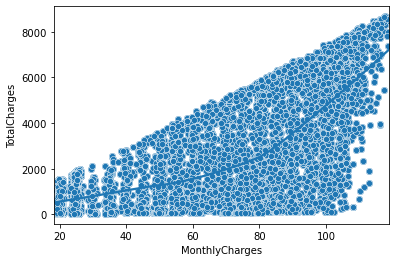

In [17]:
import seaborn as sns
sns.regplot(data=df, x="MonthlyCharges", y="TotalCharges", lowess=True)
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges");

Se Observa una relacion lineal bastante marcada. Corroboramos tambien con un R2. Mas adelante profundizaremos este analisis

In [18]:
import numpy as np
import scipy as sp
np.round(sp.stats.pearsonr(df["MonthlyCharges"], df["TotalCharges"])[0],2)

0.65

Analizamos el comportamiento de la target Churn con respecto a distintas variables categoricas ya alojadas en ls_cat

In [19]:
for cat in ls_cat:
    print("---- ", cat," ----\n")
    print(pd.crosstab(df["Churn"],df[cat]),"\n\n")

----  gender  ----

gender  Female  Male
Churn               
0         2549  2625
1          939   930 


----  SeniorCitizen  ----

SeniorCitizen     0    1
Churn                   
0              4508  666
1              1393  476 


----  Partner  ----

Partner    No   Yes
Churn              
0        2441  2733
1        1200   669 


----  Dependents  ----

Dependents    No   Yes
Churn                 
0           3390  1784
1           1543   326 


----  PhoneService  ----

PhoneService   No   Yes
Churn                  
0             512  4662
1             170  1699 


----  MultipleLines  ----

MultipleLines    No  No phone service   Yes
Churn                                      
0              2541               512  2121
1               849               170   850 


----  InternetService  ----

InternetService   DSL  Fiber optic    No
Churn                                   
0                1962         1799  1413
1                 459         1297   113 


----  OnlineS

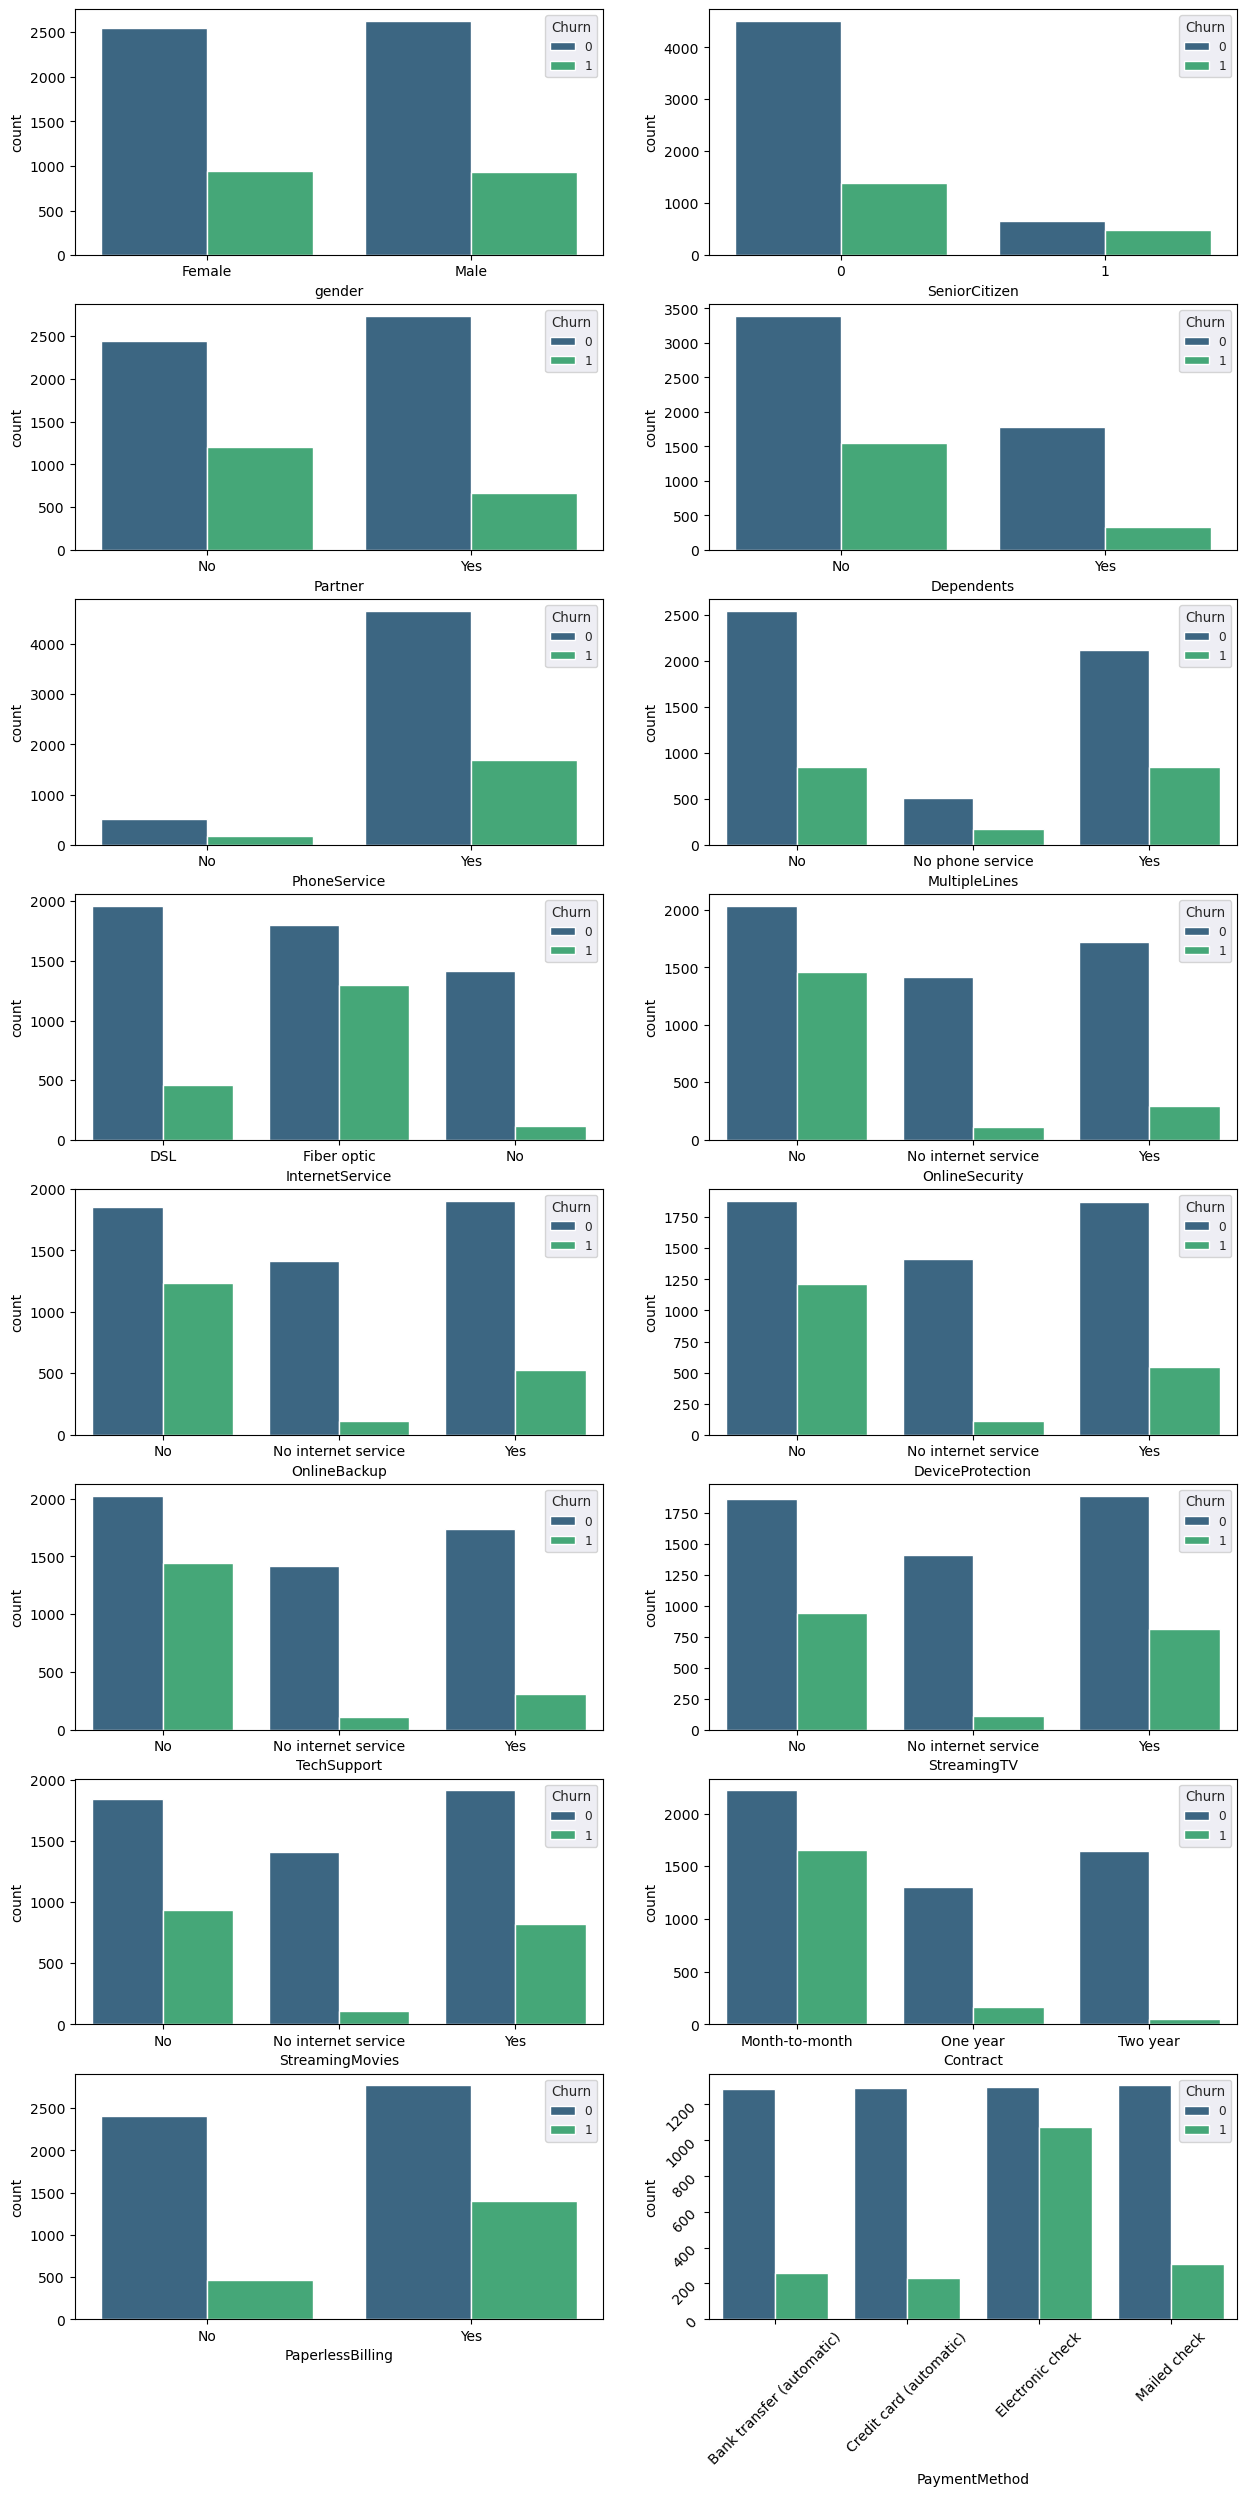

In [20]:
sns.reset_defaults()
f, ax=pt.subplots(nrows=8,ncols=2,figsize = (15,30))

i=0
for row in range(0,8,1):
    sns.set(font_scale=0.8)
    pt.tick_params(labelsize=10, labelrotation=45)
    
    for col in range(0,2,1):
        sns.countplot(ax=ax[row,col],data=df, x=ls_cat[i],hue="Churn",palette="viridis")
        i+=1
sns.reset_defaults()

Chequeamos los tipos de contratos

In [21]:
df.loc[df["Churn"]==1].groupby(["gender","Contract"])[["Churn"]].agg("count")

Churn
gender Contract             
Female Month-to-month    842
       One year           75
       Two year           22
Male   Month-to-month    813
       One year           91
       Two year           26

El abandono es similar tanto en hombres como en mujeres. Predominando en contratos de mes a mes

# PRIMERAS CONCLUSIONES

    1) Hombres y Mujeres tienen una tasa de abandono similar.
    2) La tasa de abandono es bastante alta para clientes con contratos de mes a mes. (Restaria chequear el genero en estos contratos).
    3) Los Jubilados tienen una tasa de abandono baja. Con lo cual, podriamos obviar esta variable.
    4) Las personas que tienen familiares a cargo, tienen una tasa mas baja de abandono que aquellos que no tienen familiares a cargo.
    5) Los solteros tienen una tasa de abandono mas alta que las parejas.
    6) Los clientes con Fibra Optica abandonan con una tasa mas alta (podria haber una falencia en ese servicio).
    7) Los clientes con un servicio mas basico (es decir sin OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV) tienen una tasa de abandono mas alta que aquellos que poseen el servicio.
    8) Los clientes adheridos a factura electronica tiene una tasa de abandono mas alta que los demas.
    9) Restaria analizar mas detenidamente la variable tenure (Queda para el apartado de analisisn de paretto).
    10) El dataset adolece de una variable para la edad del cliente que estimo seria muy explicativa

# RECODIFICACION DE VARIABLES

## RECODIFICAMOS LAS VARIABLES CATEGORICAS A NUMERICAS

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,0,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1,151.65


In [23]:
# Vemos las categorias y el porcentaje de imputacion en cada una
def ver_categorias_frecuentes(df, var, rare_p):
    
    df = df.copy()

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_p]

for var in ls_cat:
    
    # Vemos las categorias mas frecuentes
    frequent_ls = ver_categorias_frecuentes(df, var, 0.01)
    
    print(var, frequent_ls)
    print()

gender gender
Female    0.495244
Male      0.504756
Name: gender, dtype: float64

SeniorCitizen SeniorCitizen
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

Partner Partner
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

Dependents Dependents
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

PhoneService PhoneService
No     0.096834
Yes    0.903166
Name: PhoneService, dtype: float64

MultipleLines MultipleLines
No                  0.481329
No phone service    0.096834
Yes                 0.421837
Name: MultipleLines, dtype: float64

InternetService InternetService
DSL            0.343746
Fiber optic    0.439585
No             0.216669
Name: InternetService, dtype: float64

OnlineSecurity OnlineSecurity
No                     0.496663
No internet service    0.216669
Yes                    0.286668
Name: OnlineSecurity, dtype: float64

OnlineBackup OnlineBackup
No                     0.438450
No internet service    0.216669
Yes            

De este analisis, se desprende que hay variables categoricas que estan un poco descompensadas respecto de la cantidad de datos (SeniorCitizen, Dependents, PhoneService, Contract, PaperlessBilling ) lo cual a la hora de desplegar el modelo podria generarnos algun sobreajuste de los datos..

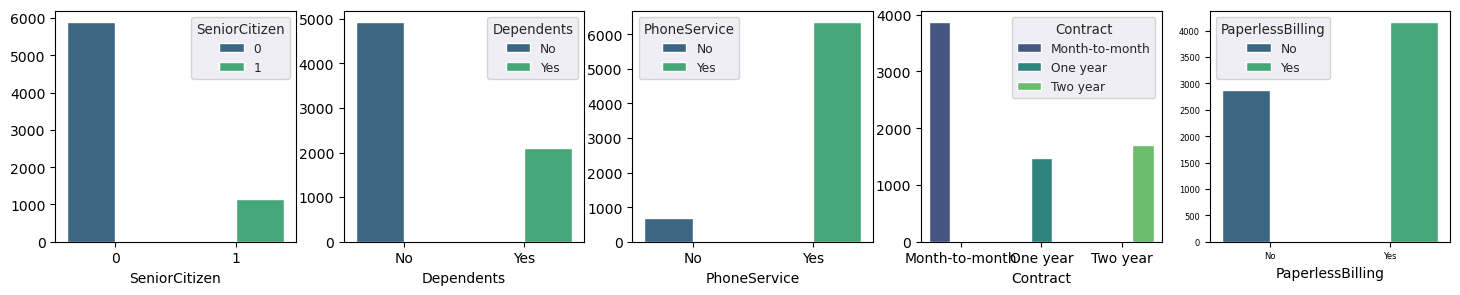

In [24]:
# Vamos a crear una lista de estas variables..

ls_descompensada=["SeniorCitizen", "Dependents", "PhoneService", "Contract", "PaperlessBilling"]

sns.reset_defaults()
f, ax=pt.subplots(ncols=len(ls_descompensada),nrows=1,figsize = (18,3))

pt.tick_params(labelsize=6)
sns.set(font_scale=0.8)

for row in range(0,len(ls_descompensada),1):
    g=sns.countplot(ax=ax[row],data=df, x=ls_descompensada[row],palette="viridis", hue=ls_descompensada[row])
    g.set(ylabel = '')
    
sns.reset_defaults()

In [25]:
dff=df.copy()
# Identificamos aquellas etiquetas que vamos en encapsular como 0 y 1 respectivamente..

cat_0=[0,"No","No internet service","No phone service","Female"]
cat_1=[1,"Yes","Fiber optic","DSL","Male"]

ls_reco=ls_cat.drop(["SeniorCitizen","Contract","PaymentMethod"])

def reco(val):
    if val in cat_0:
        return 0
    elif val in cat_1:
        return 1
    
dff=pd.DataFrame([dff[cat].map(reco) for cat in ls_reco]).T

#Desplegamos para ver como queda..

dft=df.copy()
dft.drop(columns=ls_reco,inplace=True)
dft=pd.concat([dft,dff],axis="columns")
dft

,customerID,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges,gender,Partner,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,7590-VHVEG,0,1,Month-to-month,Electronic check,29.85,0,29.85,0,1,...,0,0,1,0,1,0,0,0,0,1
1,5575-GNVDE,0,34,One year,Mailed check,56.95,0,1889.50,1,0,...,1,0,1,1,0,1,0,0,0,0
2,3668-QPYBK,0,2,Month-to-month,Mailed check,53.85,1,108.15,1,0,...,1,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,4801-JZAZL,0,11,Month-to-month,Electronic check,29.60,0,346.45,0,1,...,0,0,1,1,0,0,0,0,0,1
7041,8361-LTMKD,1,4,Month-to-month,Mailed check,74.40,1,306.60,1,1,...,1,1,1,0,0,0,0,0,0,1
7042,3186-AJIEK,0,66,Two year,Bank transfer (automatic),105.65,0,6844.50,1,0,...,1,0,1,1,0,1,1,1,1,1


## DISCRETIZAMOS

In [31]:
# Hacemos una copia de la lista de variables numericas..
ls=ls_num.copy()
ls.remove("Churn")
ls.remove("customerID")
ls

['tenure', 'MonthlyCharges', 'TotalCharges']

In [32]:
# Primero revisamos los percentiles

for var in ls:
    print(dft[var].quantile([0,0.25,0.5,0.75,1]),"\n\n")


0.00     0.0
0.25     9.0
0.50    29.0
0.75    55.0
1.00    72.0
Name: tenure, dtype: float64 


0.00     18.25
0.25     35.50
0.50     70.35
0.75     89.85
1.00    118.75
Name: MonthlyCharges, dtype: float64 


0.00      18.80
0.25     398.55
0.50    1394.55
0.75    3786.60
1.00    8684.80
Name: TotalCharges, dtype: float64 




In [34]:
dft["TotalCharges_disc"]=pd.qcut(df["TotalCharges"],[0,0.25,0.5,0.75,1])
dft["TotalCharges_disc"]=dft["TotalCharges_disc"].astype("category")

dft["tenure_disc"]=pd.qcut(dft["tenure"],[0,0.25,0.5,0.75,1])
dft["tenure_disc"]=dft["tenure_disc"].astype("category")

(dft.groupby("TotalCharges_disc")["TotalCharges_disc"].count())/len(dft)

print(dft["TotalCharges_disc"].value_counts(),"\n\n")
print(dft["tenure_disc"].value_counts())

(18.799, 398.55]     1762
(3786.6, 8684.8]     1761
(398.55, 1394.55]    1760
(1394.55, 3786.6]    1760
Name: TotalCharges_disc, dtype: int64 


(-0.001, 9.0]    1854
(55.0, 72.0]     1755
(29.0, 55.0]     1719
(9.0, 29.0]      1715
Name: tenure_disc, dtype: int64


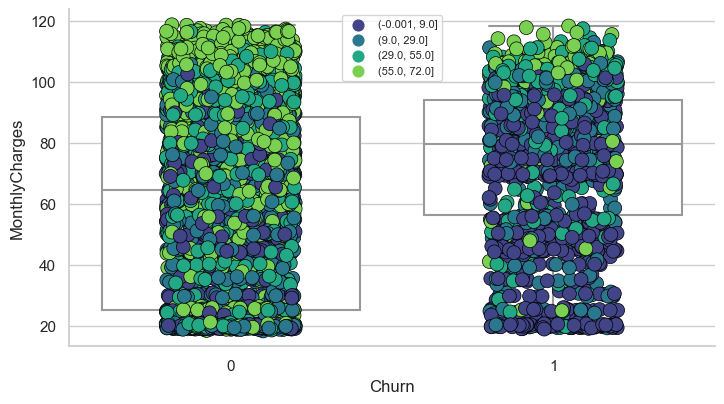

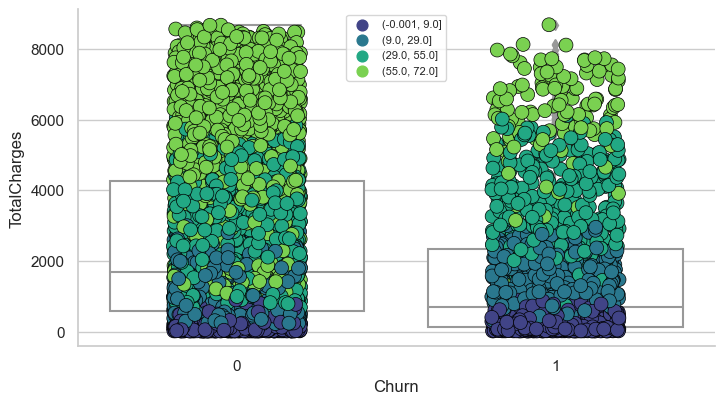

In [50]:
# Luego graficamos respecto de tenure..

for var in ls:
    if var!="tenure":
        # make boxplot with Catplot
        sns.catplot(x="Churn", y=var, data=dft, kind="box", height=4, aspect=1.8, color="white")
        # add data points to boxplot with stripplot
        sns.stripplot(x="Churn", y=var, data=dft,palette="viridis",
                      jitter=0.2,size=10, edgecolor="black",linewidth=0.5,hue="tenure_disc")
        pt.legend(loc="upper center",fontsize=8)
        pt.show()

## ANALIZAMOS INFORMACION CRUZADA CON LAS VARIABLES DISCRETIZADAS

In [36]:
dft.groupby(["gender","tenure_disc"])["gender"].agg("count")

gender  tenure_disc  
0       (-0.001, 9.0]    918
        (9.0, 29.0]      851
        (29.0, 55.0]     863
        (55.0, 72.0]     856
1       (-0.001, 9.0]    936
        (9.0, 29.0]      864
        (29.0, 55.0]     856
        (55.0, 72.0]     899
Name: gender, dtype: int64

In [37]:
dft.groupby(["tenure_disc","TotalCharges_disc"])["tenure_disc"].agg("count")

tenure_disc    TotalCharges_disc
(-0.001, 9.0]  (18.799, 398.55]     1517
               (398.55, 1394.55]     337
               (1394.55, 3786.6]       0
               (3786.6, 8684.8]        0
(9.0, 29.0]    (18.799, 398.55]      245
               (398.55, 1394.55]     896
               (1394.55, 3786.6]     574
               (3786.6, 8684.8]        0
(29.0, 55.0]   (18.799, 398.55]        0
               (398.55, 1394.55]     389
               (1394.55, 3786.6]     832
               (3786.6, 8684.8]      498
(55.0, 72.0]   (18.799, 398.55]        0
               (398.55, 1394.55]     138
               (1394.55, 3786.6]     354
               (3786.6, 8684.8]     1263
Name: tenure_disc, dtype: int64

<Figure size 600x600 with 0 Axes>

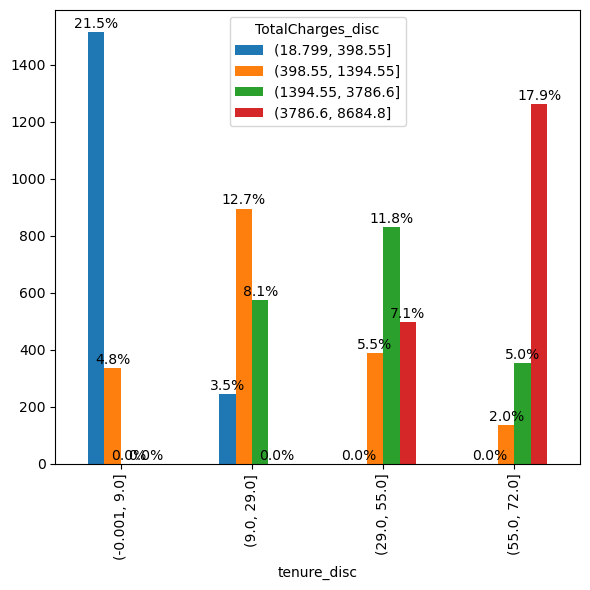

In [38]:
# Revisamos graficamente Tenure discretizada vs TotalCharges discretizada. Nos arroja buena informacion respecto
# del gasto de los clientes en la diferentes franjas de permanencia..

pt.figure(figsize=(6,6))
ax=pd.crosstab(dft["tenure_disc"],dft["TotalCharges_disc"]).plot.bar(figsize=(6,6))

total = len(dft)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
pt.tight_layout()
pt.show();

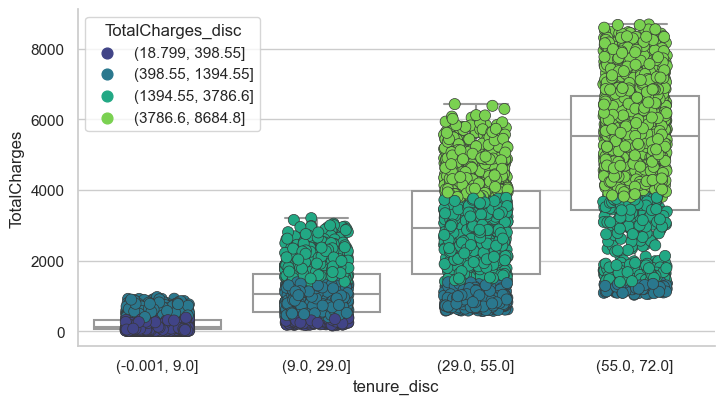

In [52]:
# Un grafico mas visual..

sns.set(style = 'whitegrid')

sns.catplot(x="tenure_disc", y="TotalCharges", data=dft, kind="box", height=4, aspect=1.8,color="white")

sns.stripplot(x="tenure_disc", y="TotalCharges", 
              hue="TotalCharges_disc", data=dft,jitter=0.2,
              palette="viridis", linewidth=0.5,size=8)
pt.show()

## ANALISIS DE PARETTO DE CHURN

Vamos a realizar un analisis de paretto para identificar que porcentaje acumulado de la tasa de abandono corresponde a cada segmento de tenure y en consecuencia, analizar que porcentaje de la target Churn explica tenure..

In [40]:
paretto=dft[dft["Churn"]==1].groupby("tenure_disc")[["Churn"]].agg("count")
paretto["Acum"]=paretto["Churn"].cumsum()
paretto["Perc"]=np.round(100*paretto["Acum"]/dft.loc[dft["Churn"]==1].shape[0],2)
paretto

,Churn,Acum,Perc
tenure_disc,,,
"(-0.001, 9.0]",923,923,49.38
"(9.0, 29.0]",486,1409,75.39
"(29.0, 55.0]",324,1733,92.72
"(55.0, 72.0]",136,1869,100.00


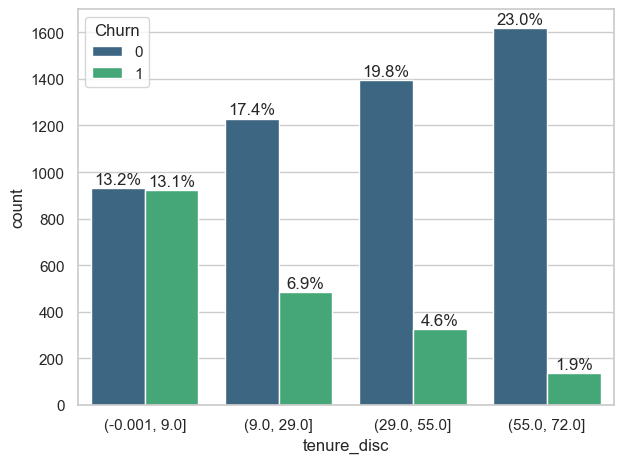

In [41]:
ax = sns.countplot(data=dft, x="tenure_disc",hue="Churn",palette="viridis")
total = len(dft)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
pt.tight_layout()
pt.show()

Se observa una clara relacion lineal inversa entre tenure y Churn. Podriamos ampliar los cortes y volver a discretizar para un mejor analisis aun. 

In [42]:
print("Tasa de abandono real: " , np.round(dft.loc[dft["Churn"]==1].shape[0]/len(dft),2)*100,"%")

Tasa de abandono real:  27.0 %


**Verificamos la linealidad observada en MonthlyCharges vs TotalCharges dentro de cada categoria de Contract y para cada valor de Churn..**

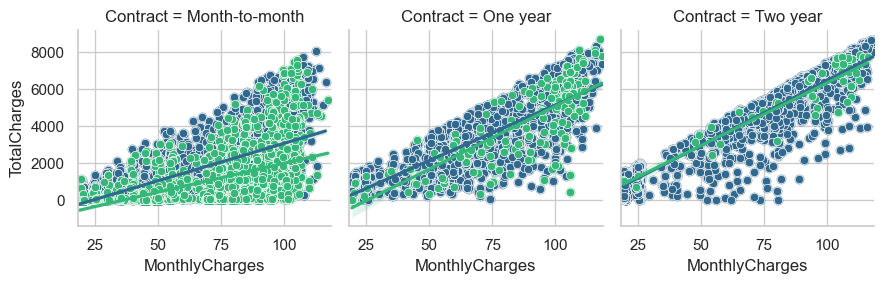

In [43]:
grid = sns.FacetGrid(dft, col='Contract',hue="Churn",palette="viridis",legend_out=False)
grid.map(sns.regplot,'MonthlyCharges','TotalCharges')
grid.map(sns.scatterplot,'MonthlyCharges','TotalCharges')
pt.show()

Vemos que la relacion lineal es mas fuerte en contratos de uno y dos años tanto para los que abandonaron como los que se quedaron..

C:\Users\prose\miniconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


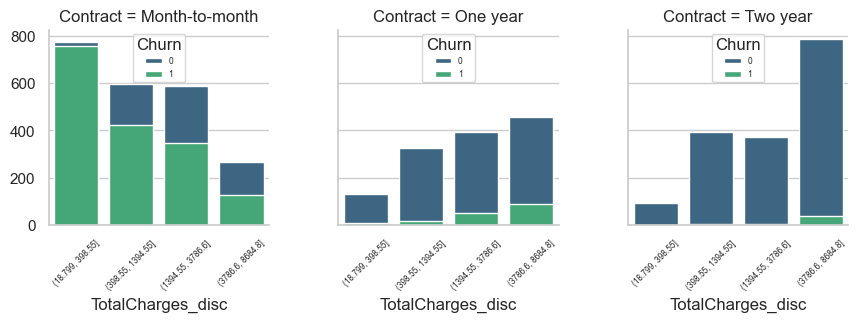

In [44]:
grid = sns.FacetGrid(data=dft, col='Contract',hue="Churn",palette="viridis",legend_out=False)
grid.map(sns.countplot,'TotalCharges_disc')

for axis in grid.axes.flat:
    axis.tick_params(axis="x", labelsize=6, labelrotation=45)
    axis.legend(title="Churn",loc="upper center",fontsize=6)
pt.show()

## **NUEVAS CONCLUSIONES**

    1) El rango de antiguedad de mas de 29 meses es el que pareciera gastar mas, predominando como los mas gastadores aquellos con mas de 55 meses.
    2) Se observa que la tasa de abandono en el total del dataset es del 27%. De la cual el 75.39% se corresponde con clientes de antiguedad menor a los 29 meses. Concluimos que tenure es un predictor muy fuerte.
    3) Churn tiene una penetracion muy fuerte en la variable Total Charges para contratos de mes a mes. No asi para el resto de las categorias. Probablemente al momento de generar las variables dummies para modelizar, conservemos solo las de contrato mes a mes.